<a href="https://colab.research.google.com/github/fnikolas221/DataMiningSimpleProj/blob/master/Topik_14_Fernando_Nikolas_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Analisis Pengunjung Mall dengan menggunakan Metode Clustering </h1>

**Brief** :

Kali ini akan dilakukan sebuah analisis terhadap penggunjung suatu mall dengan menggunakan metode clustering. Tujuan dari analisis ini adalah untuk mengetahui kelas-kelas pengunjung yang mungkin terbentuk dari dataset yang diberikan.

**Dataset**

Dataset diperoleh dari kaggle : https://www.kaggle.com/code/fazilbtopal/popular-unsupervised-clustering-algorithms/data

# **Persiapan**

In [ ]:
# Untuk Tabulasi dan analisis
import pandas as pd
# Untuk perhitungan
import numpy as np
import math as m

# Untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
# URL Dataset
URL = "https://drive.google.com/uc?id=1Zm7MGbQYtji8NMG-IaIU8kJov4CLm2Qc"

# **Data Understanding**

Pertama-tama kita perlu mengambil dataset dan menyimpanya dalam dataframe

In [ ]:
df = pd.read_csv(URL,index_col="CustomerID")

Menampilkkan 5 baris pertama

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
# Shape
df.shape

(200, 4)

Melihat tipe data pada dataset serta banyaknya data yang terisi pada dataset

In [ ]:
# Menampilkan Informasi variabel pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


Terlihat bahwa dataset tidak memiliki null values dan setiap tipe datanya telah sesuai.

## Penjelasan Kolom

Berdasarkan dari [Kaggle (sumber-data)](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python). Setiap kolom pada dataset memiliki deskripsi sebagai berikut.

> Gender : Jenis Kelamin Customer <br>
> Age  : Umur Customer <br>
> Annual Income : Pendapatan  <br>
> SpendingScore : Score yang diberikan berdasarkan perilaku customer dan  <br>riwayat penjualan

# **Data Cleaning**

## Handling Null Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


Mengecek apakah empty string atau NaN terdapat pada Kolom Gender

In [ ]:
df[df.Gender.isin([" ",np.nan])]

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,


Karena tidak terdpat Null Values pada dataset. Sehingga tahap ini dapat dilanjutkan

## Handling Duplicate Data

In [ ]:
df[df.duplicated()]

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,


Pada dataset diatas, diketahui bahwa tidak terdapat data yang terduplikasi

## Handling Outlier

In [ ]:
def outlier(col):
    Q1 = df[col].quantile(0.25) # Mengetahui mana yang quartile 1
    Q3 = df[col].quantile(0.75) # Mengetahui mana yang quartile 3
    IQR = Q3 - Q1 # Simpangan Quartile (q3-q1)    
    return df[(df[col]> Q3 +1.5*IQR)  | (df[col]< Q1-1.5*IQR )]

In [ ]:
outlier("Age")

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,


In [ ]:
outlier("Spending Score (1-100)")

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,


In [ ]:
outlier("Annual Income (k$)")

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
199,Male,32,137,18
200,Male,30,137,83


Pada kolom Annual Income terdapat 2 value yang merupakan *outlier*. Namun karena outlier tersebut tidak terlalu banyak. Maka dataset tersebut tidak perlu dihapus.

# **Data Visualization and Analysis**

Pertama-tama kita dapat melihat summary terhadap statisik dataframe yang ada

Summary ini berisi rata-rata, standar deviasi, nilai max dan niali min,
quartil 1, 2 (median) , dan 3 

In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## **Univariate Analysis**

<h3><b>Distribution</b></h3>

Pertama kita dapat melihat distribusi dan persebaran dari **Age**,  **Annual Income (k$)**,  **Spending Score (1-100)**

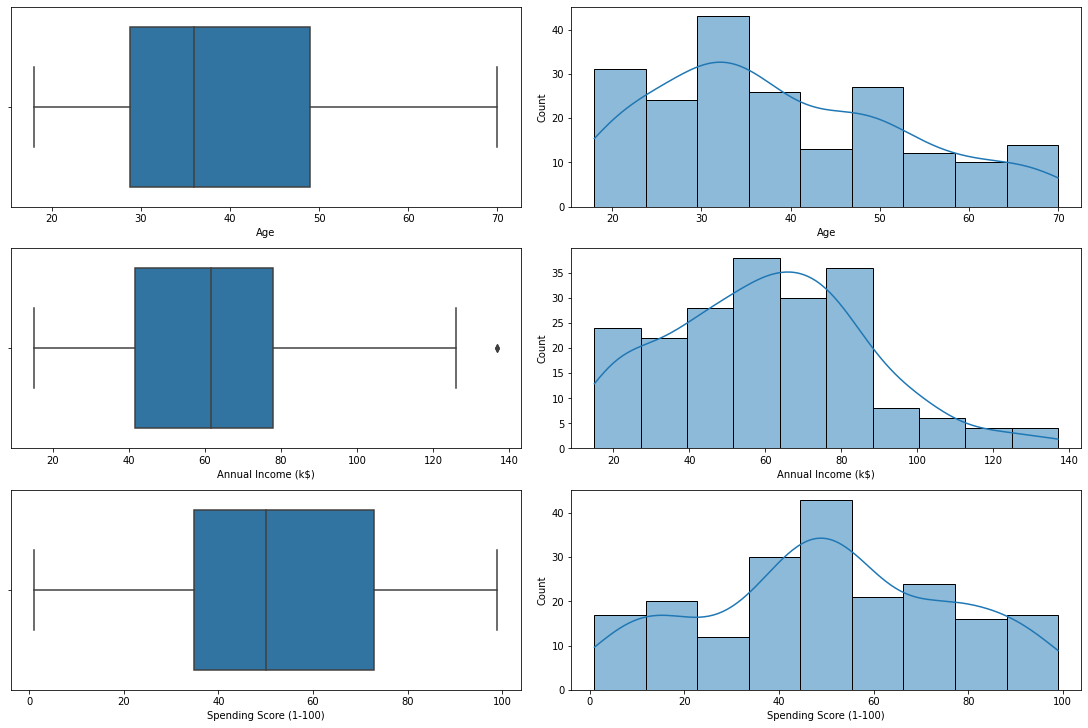

In [ ]:
cols = ["Age","Annual Income (k$)","Spending Score (1-100)"]
fig, axes = plt.subplots(3, 2, figsize=(15, 10),constrained_layout = True)

for ax,col in zip(axes,cols):
    sns.boxplot(data=df,x=col,ax=ax[0])
    sns.histplot(df,x=col,ax=ax[1],kde=True)

Pad visualisasi distribusi diatas. Ditemukan bahwa :



1.   Pengunjung terbanyak berada di usia muda. Hal ini dapat terlihat bahwa age yang relatif *left-skewed* 
2.   Pendapatan tahunan terbanyak berada pada rentang 10-80 ribu dollar.
3. Spending score pengunjung mendekati distribusi normal


## **Bivariate Analysis**

Bagian ini menampilkan relasi antar dua variabel pada dataset

In [ ]:
df.groupby("Gender").describe()

Age                                                       \
        count       mean        std   min    25%   50%   75%   max   
Gender                                                               
Female  112.0  38.098214  12.644095  18.0  29.00  35.0  47.5  68.0   
Male     88.0  39.806818  15.514812  18.0  27.75  37.0  50.5  70.0   

       Annual Income (k$)             ...                \
                    count       mean  ...    75%    max   
Gender                                ...                 
Female              112.0  59.250000  ...  77.25  126.0   
Male                 88.0  62.227273  ...  78.00  137.0   

       Spending Score (1-100)                                              \
                        count       mean       std  min   25%   50%   75%   
Gender                                                                      
Female                  112.0  51.526786  24.11495  5.0  35.0  50.0  73.0   
Male                     88.0  48.511364  27.89677  1.0  24.5  50.0  70.0   

              
         max  
Gender        
Female  99.0  
Male    97.0  

[2 rows x 24 columns]

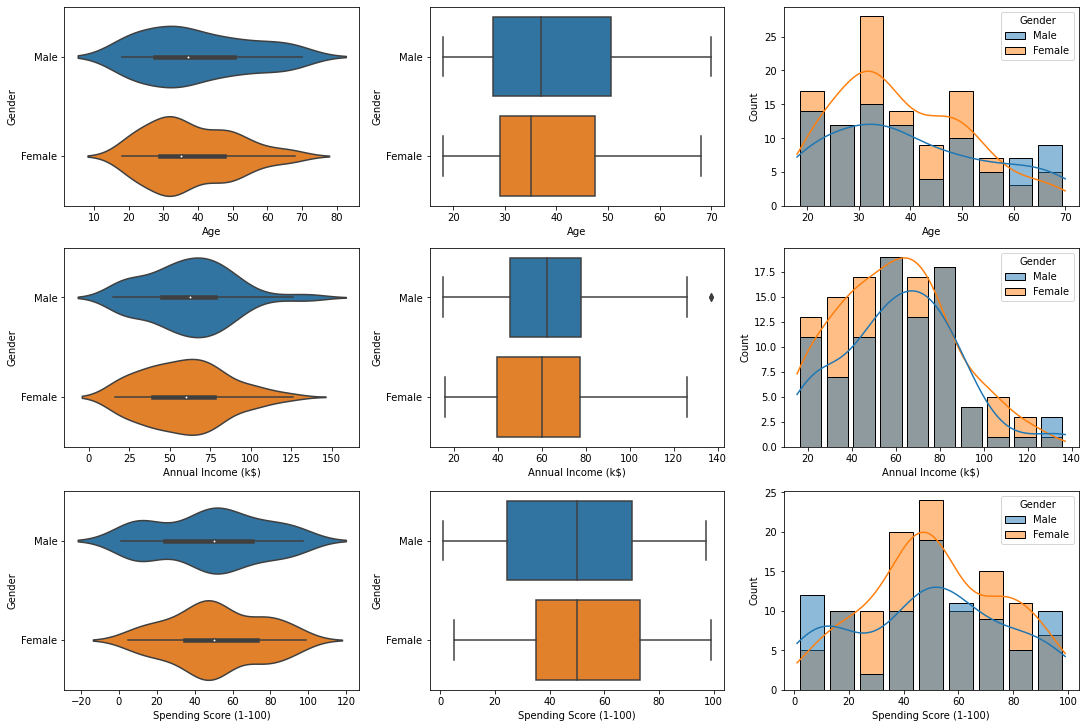

In [ ]:
cols = ["Age","Annual Income (k$)","Spending Score (1-100)"]
fig, axes = plt.subplots(3, 3, figsize=(15, 10),constrained_layout = True)

for ax,col in zip(axes,cols):
    sns.boxplot(data=df,x=col,y="Gender",ax=ax[1])
    sns.violinplot(data=df,x=col,y="Gender",ax=ax[0])
    sns.histplot(df,x=col,ax=ax[2],kde=True,hue="Gender",shrink=.8)

## **Multivariate Analysi**s

Bagian ini menampilkan korelasi lebih dari satu variabel

In [ ]:
df_corr = pd.get_dummies(df).corr()

In [ ]:
px.imshow(df_corr)

In [ ]:
fig = px.scatter_matrix(df,dimensions=cols,color="Gender")
fig.update_layout(dragmode='select',
                  width=1000,
                  height=1000,
                  hovermode='closest')
fig.show()

Pada pairplot dan heatmap diatas terlihat bahwa tidak terdapat korelasi yang kuat antar variabel yang ada. Salah satu korelasi yang cukup kuat ada pada korelasi antara spending score dengan umur. Yang menandakan adanya kemungkinan bahwa semakin muda seseorang maka spending scorenya semakin tinggi (Semakin muda semakin konsumtif)

# **Modelling**

## Pre Processing

In [ ]:
# Untuk Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering,KMeans,AffinityPropagation,Birch

# Untuk scalling dan normalisasi
from sklearn.preprocessing import StandardScaler

# Metric Pengukuran
# sumber : https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score


In [ ]:
# PreProcessing
# Encoding DataTraining
X_train = pd.get_dummies(df,drop_first=True)

Dibuatlah sebuah class untuk memudahkan proses visualiasi,normalisasi, dan pengukuran cluster pada tiap algoritma cluster yang berbeda

In [ ]:
# Creating a class to handle clustering
class Cluster:
    
    # Pada constructor terjadi beberapa proses
    # 1. Membuat normalisasi data
    
    def __init__(self,train):
        self.train = train
        self.scaled = StandardScaler().fit_transform(self.train)
        self.clusters = None
        self.name = None
        self._label = None

    # Method apply adalah fungsi kedua yang harus dijalankan
    # Method apply akan menerima argumen tambahan sebagai argumen untuk 
    # algoritma cluster yang akan digunakan
    def apply(self,cluster_algo,**kwargs):
        agg_cluster = cluster_algo(**kwargs)


        self.clusters = agg_cluster.fit(self.scaled) #Set Value
        self._label = self.clusters.labels_ #Set value

        # Mengambil nama algoritma clusternya
        self.name = type(self.clusters).__name__

        return self
    
    # Df untuk membuat dataframe
    def df(self,normalized=False):

        if normalized:
            X = pd.DataFrame(self.scaled,columns=self.train.columns)
        else:
            X = self.train.copy(deep=True)
        
        X["Cluster"] = self._label
        X["Cluster"] = X['Cluster'].astype(object)

        return X
    # Untuk Mendapatkan cluster ke N
    def get_cluster(self,n,normalized=False):
        df = self.df(normalized)
        
        return df[df["Cluster"] == n]

    # Plot untuk membuat scatterplot 
    def plot(self,X,Y,normalized=False):
        return px.scatter(self.df(normalized), x=X, y=Y, color="Cluster")

    # Plot 3d untuk membuat scatterplot 3d
    def plot_3d(self,X,Y,Z,normalized=False):
        return px.scatter_3d(self.df(normalized), x=X, y=Y,z=Z, color="Cluster")

    # menggunakan decorator property untuk mengonversi method menjadi property
    @property
    def metric(self): #Method ini berfungsi untuk mengambil hasil pengukuran berdasrkan metric ...
        label = self._label
        # Ini metric yang digunakan 'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'
        
        return [silhouette_score(self.scaled,label),davies_bouldin_score(self.scaled,label),calinski_harabasz_score(self.scaled,label)]

        
            
        

**Menentukan banyak cluster maksimal.**

Salah satu cara untuk menentukan banyak cluster maksimal adalah dengan
menggunakan pengukuran SSE  Jarak kuadrat antar centroid dari setiap cluster.

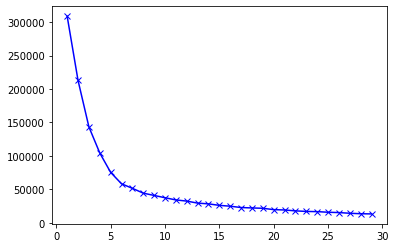

In [ ]:
sse = [] #Daftar SSE
K = range(1,30) #Banyak Cluster hingga 30
# Perulangan hingga 30 Cluster
for k in K:
    kmeans = KMeans(n_clusters= k,random_state=42).fit(X_train)
    #Mendapatkan SSE dan append ke list sse
    sse.append(kmeans.inertia_)

# Membuat plot K terhadap SSE
plt.plot(K,sse, "bx-")


Berdasarkan Plot diatas dan *elbow rule*, ** 5 ** ditentukan sebagai banyak cluster yang akan digunakan

## Modelling

### K-Means

In [ ]:
# Pertama-tama kita perlu menerapkan algoritma KMeans kedalam kelas Cluster
kmeans = Cluster(X_train).apply(KMeans,n_clusters=5,random_state=42) #n_cluster adalah banyak clusternya

Berikut ini adalah hasil cluster dari K-Means

In [ ]:
# Untuk menampilkan dataframe 
kmeans.df().head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster
CustomerID,,,,,
1,19,15,39,1,1
2,21,15,81,1,1
3,20,16,6,0,2
4,23,16,77,0,0
5,31,17,40,0,2


In [ ]:
# Menampilkan plot berdasarkan dataframe dan 3 variabel x,y,z
kmeans.plot_3d("Age","Annual Income (k$)","Spending Score (1-100)")

### AgglomerativeClustering

In [ ]:
# Pertama-tama kita perlu menerapkan algoritma KMeans kedalam kelas Cluster
Agg = Cluster(X_train).apply(AgglomerativeClustering,n_clusters=5)

In [ ]:
# Untuk menampilkan hasil cluster dalam bentuk dataframe 
Agg.df().head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster
CustomerID,,,,,
1,19,15,39,1,0
2,21,15,81,1,0
3,20,16,6,0,3
4,23,16,77,0,0
5,31,17,40,0,3


In [ ]:
# Plot cluster yang diperoleh
Agg.plot_3d("Age","Annual Income (k$)","Spending Score (1-100)")

### Birch

In [ ]:
# Pertama-tama kita perlu menerapkan algoritma KMeans kedalam kelas Cluster
br = Cluster(X_train).apply(Birch,n_clusters=5)

In [ ]:
# Menampilkan hasil cluster dalam bentuk dataframe
br.df().head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster
CustomerID,,,,,
1,19,15,39,1,4
2,21,15,81,1,4
3,20,16,6,0,1
4,23,16,77,0,1
5,31,17,40,0,1


In [ ]:
# Scatter plot cluster tersebut
br.plot_3d("Age","Annual Income (k$)","Spending Score (1-100)",True)

## Metric Pengukuran

Untuk mengukur seperapa efektif algoritma-algoritma diatas mengclusterkan dataset yang ada, dilakukanlah beberapa pengukuran.

Metric yang digunakan pada pengukuran ini adalah sebagai berikut 

**A. Silhouette Coefficient:**

Pengukuran metrik ini dilakukan dengan menghitung rata-rata jarak didalam cluster dan jarak dengan anggota cluster terdekat. Nilainya bervariasi antara -1 hingga 1

1 : Artinya clusternya saling terpisah dan tiap cluster dapat terlihat perbedaannya

0: Tiap cluster tidak jelas perbedaannya dan tidak signifikan

1 : Clustering tidak berjalan dengan baik. 
<br>
<br>
**B. calinski harabasz score**

 Pengukuran metrik ini dilakukan dengan mengukur rasio jarak antara titik dengan pusat clusternya serta jarak antara centroid cluster dengan titik utama dari keseluruhan data. 

Semakin tinggi nilai CH (Calinski Harabasz) maka semakin baik pula cluster tersebut

<br>
<br>

**C. davies bouldin score**


Pengukuran metrik ini dilakukan dengan cara mengukur rata-rata kesamaan dari setiap cluster dengan cluster yang memiliki kesamaan terhadap cluster tersebut. Kesamaan tersebut diukur dari raio antara jarak pada dalam cluster dengan jarak terhadap cluster terdekat.

Semakin kecil nilai pengukuran ini maka semakin baik pula cluster atau agloritma yang digunakan.

In [ ]:
# Mengumpulkan Algorita Apa Saca yang dipakai
algos = [Agg,kmeans,br]

# Untuk menampung hasil metrik (bentuk list dari list metrics ini adalah nested list)
metrics = [i.metric for i in algos]

# Nama dari setiap algo menjadi indexnya
index = [i.name for i in algos]

# Penamaan Kolmnya
df_metric = pd.DataFrame(metrics,index=index,columns=['silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'])


Sehingga diperoleh hasil metrik sebagai berikut

In [ ]:
df_metric

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
AgglomerativeClustering,0.286994,1.219773,64.468707
KMeans,0.317091,1.150599,71.209404
Birch,0.291344,1.193561,63.407901


[Berdasarkan deskripsi metrik pengukuran di atas](#scrollTo=jo3sXTlk4OhQ). Dapat ditentukan algoritma terbaik yang memenuhi ketentuan adalah sebagai berikut

In [ ]:
# https://stackoverflow.com/questions/28075699/coloring-cells-in-pandas
best = [
    df_metric.iloc[:,0].max() # Makin Tinggi Nilai silhoutte makin bagus
    ,df_metric.iloc[:,1].max(), # Makin Tinggi Nilai CH makin bagus
    df_metric.iloc[:,2].min()
    ] # Makin rendah nilai David Bouldin makin bagus

#Ini untuk conditional formatting
def _color_green(val):
    if val in best:
        return 'background-color: green; color:white'
    return 'backround-color:white'

In [ ]:
# Menampilkan tabel setelah dilakukan contional formatting
df_metric.style.applymap(_color_green)

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
AgglomerativeClustering,0.286994,1.219773,64.468707
KMeans,0.317091,1.150599,71.209404
Birch,0.291344,1.193561,63.407901


Berdasarkan pengukuran diatas ditemukan bahwa **Birch** merupakan algoritma yang cukup ideal untuk pengukuran ini. Hal tersebut terlihat dari nilai davies bouldin score yang tinggi serta nilai *silouette* dan *calinski harabasz* score yang menempati posisi kedua terbaik

## Analisis Cluster

In [ ]:
# Pertama kita perlu membuat fungsi plot untuk plotting cluster
def plot_cluster(cluster_df):
    plot, ax = plt.subplots(2,4,figsize=(30,7),constrained_layout = True)
    sns.countplot(data=cluster_df,x="Gender_Male",ax=ax[1][3])
    for i,col in enumerate(cols):
        sns.histplot(data=cluster_df,x=col,ax=ax[0][i],kde=True)
        sns.boxplot(data=cluster_df,x=col,ax=ax[1][i])

In [ ]:
# Kolom yang berisi numerikkal
cols = ["Age","Annual Income (k$)","Spending Score (1-100)"]

In [ ]:
# Membuat List Tiap Cluster yang ada
cluster1 = br.get_cluster(0)
cluster2 = br.get_cluster(1)
cluster3 = br.get_cluster(2)
cluster4 = br.get_cluster(3)
cluster5 = br.get_cluster(4)

### Cluster 1

In [ ]:
# Menampilkan deskripsi statistik dari cluster 1
cluster1.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
count,45.000000,45.000000,45.000000,45.0
mean,50.244444,64.400000,29.022222,1.0
std,14.116650,23.904545,19.537248,0.0
min,19.000000,19.000000,1.000000,1.0
25%,43.000000,48.000000,11.000000,1.0
50%,50.000000,63.000000,29.000000,1.0
75%,60.000000,78.000000,46.000000,1.0
max,70.000000,137.000000,60.000000,1.0


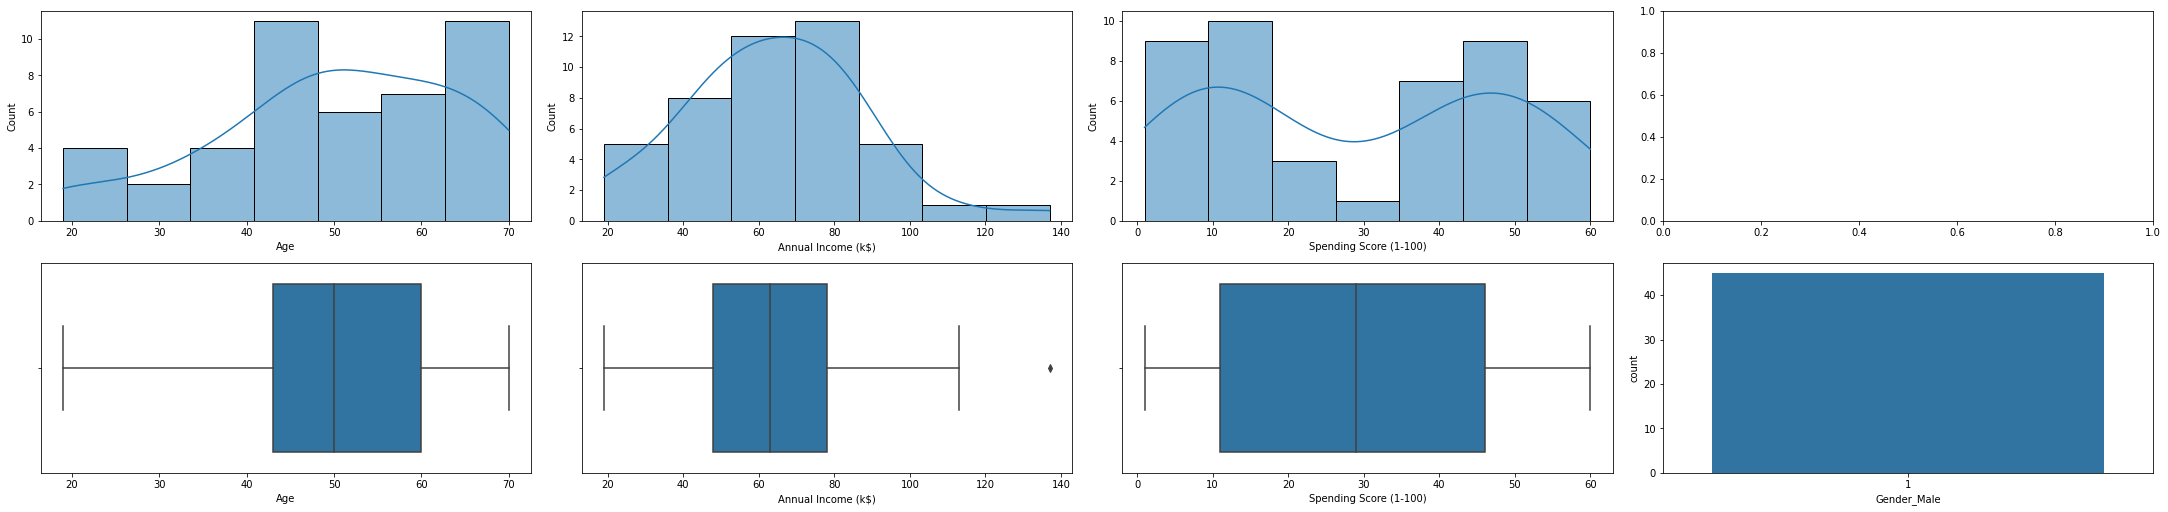

In [ ]:
# Menampilkan distribusi dari cluster1
plot_cluster(cluster1)

Ciri - Ciri Cluster 1 :
- Semuanya laki-laki
- Rata-rata Pendapatannya $64.000/ tahun
- Umurnya kebanyakan di usia 40-60 (diihat dari q1 dan q3nya)
- Spending Scorenya rata-rata 29 (tidak terlalu konsumtif)

### Cluster 2

In [ ]:
# Menampilkan deskripsi statistik dari cluster 2
cluster2.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
count,46.000000,46.000000,46.000000,46.0
mean,30.000000,39.021739,49.000000,0.0
std,9.906227,17.681741,24.815766,0.0
min,18.000000,16.000000,5.000000,0.0
25%,23.000000,23.500000,32.500000,0.0
50%,27.500000,37.000000,47.500000,0.0
75%,35.000000,54.000000,70.250000,0.0
max,58.000000,76.000000,99.000000,0.0


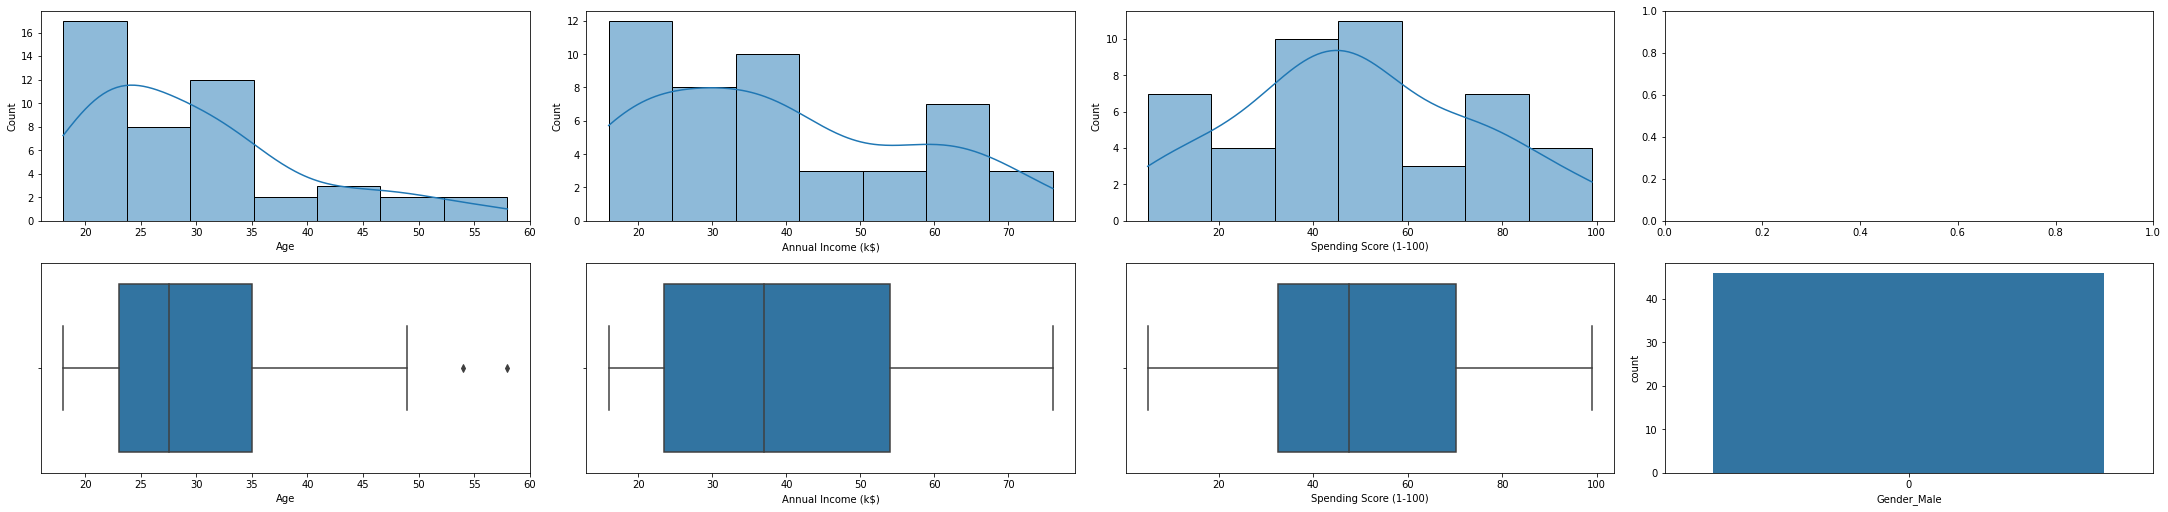

In [ ]:
# Menampilkan deskripsi statistik dari cluster 2
plot_cluster(cluster2)

Ciri - Ciri Cluster 2 :
- Semuanya laki-laki
- Rata-rata Pendapatannya $39.000/ tahun
- Umurnya kebanyakan di usia 23-35 (diihat dari q1 dan q3nya) (tergolong usia muda)
- Spending Scorenya rata-rata 49 (Cukup konsumtif)

### Cluster 3

In [ ]:
# Menampilkan deskripsi statistik dari cluster 3
cluster3.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
count,39.000000,39.000000,39.000000,39.000000
mean,32.692308,86.538462,82.128205,0.461538
std,3.728650,16.312485,9.364489,0.505035
min,27.000000,69.000000,63.000000,0.000000
25%,30.000000,75.500000,74.500000,0.000000
50%,32.000000,79.000000,83.000000,0.000000
75%,35.500000,95.000000,90.000000,1.000000
max,40.000000,137.000000,97.000000,1.000000


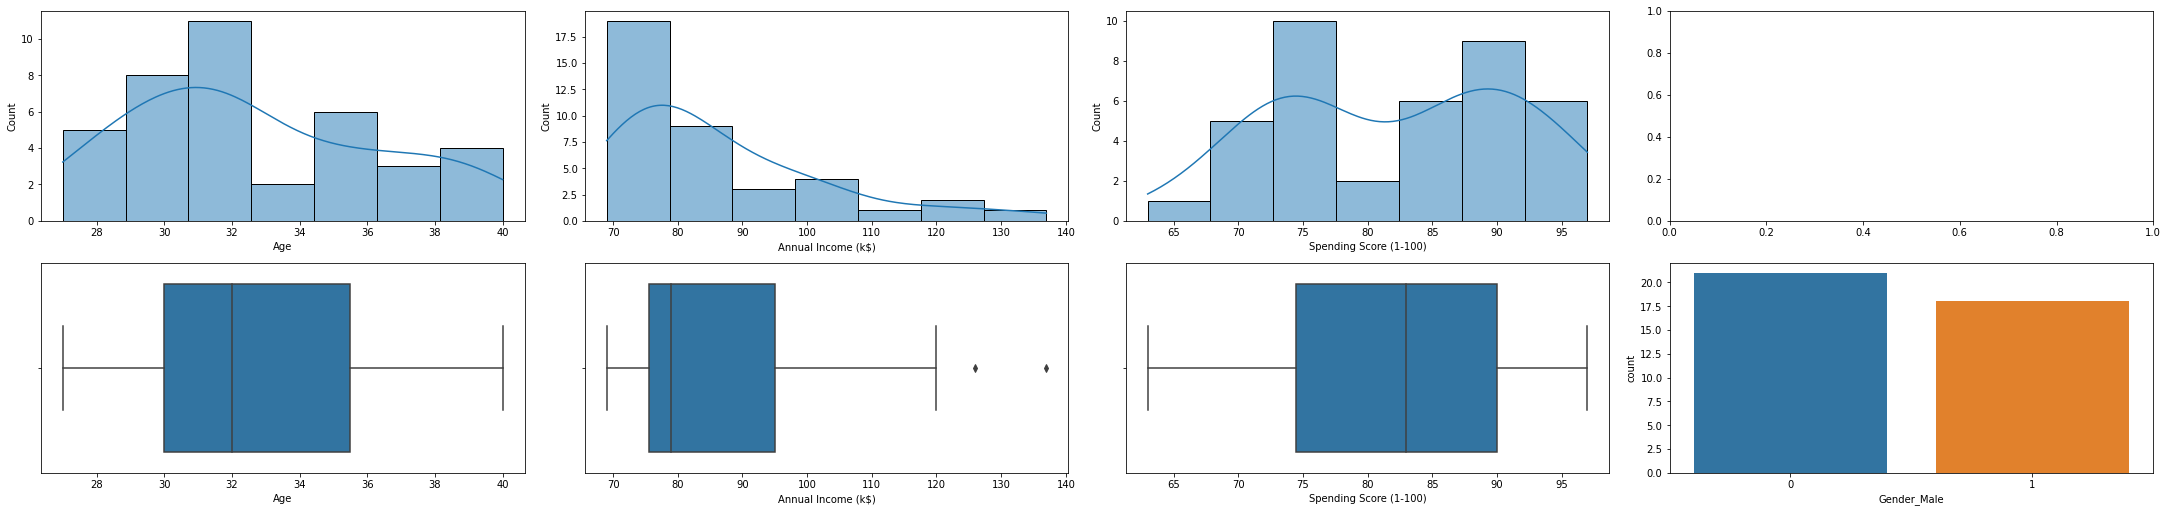

In [ ]:
# Menampilkan distribusi dari cluster3
plot_cluster(cluster3)

Ciri - Ciri Cluster 3 :
- Perempuan tergolong dalam cluster 3, terdapat pula laki-laki pada cluster ini
- Rata-rata Pendapatannya $86.000/ tahun
- Umurnya kebanyakan di usia 30-36 dilihat dari q3 dan q1
- Spending Scorenya rata-rata 86 (sangat konsumtif)

### Cluster 4

In [ ]:
# Menampilkan deskripsi statistik dari cluster 4
cluster4.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
count,45.000000,45.000000,45.000000,45.0
mean,49.133333,67.422222,40.044444,0.0
std,9.428198,21.383393,15.305904,0.0
min,34.000000,38.000000,5.000000,0.0
25%,43.000000,50.000000,28.000000,0.0
50%,49.000000,63.000000,43.000000,0.0
75%,54.000000,78.000000,52.000000,0.0
max,68.000000,126.000000,60.000000,0.0


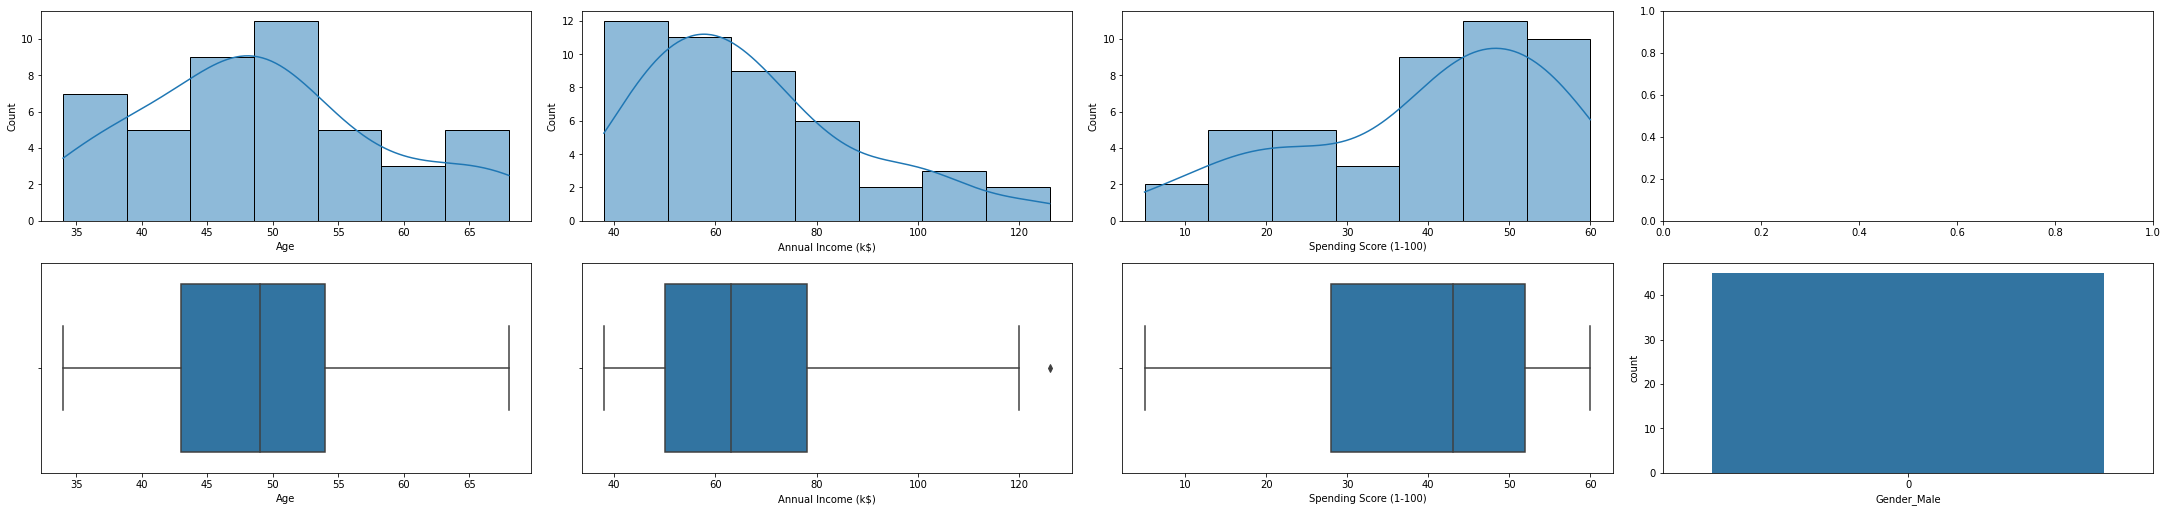

In [ ]:
# Menampilkan distribusi dari cluster 4
plot_cluster(cluster4)

Ciri - Ciri Cluster 4 :
- Semuanya laki-laki
- Rata-rata Pendapatannya $67.000/ tahun
- Umurnya kebanyakan di usia 43-54 dilihat dari q3 dan q1
- Spending Scorenya rata-rata 40 (Cukup konsumtif)

### Cluster 5

In [ ]:
# Menampilkan deskripsi statistik dari cluster 5
cluster5.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
count,25.000000,25.000000,25.000000,25.0
mean,25.720000,40.400000,59.000000,1.0
std,7.115242,17.358955,18.227726,0.0
min,18.000000,15.000000,13.000000,1.0
25%,19.000000,24.000000,49.000000,1.0
50%,24.000000,42.000000,56.000000,1.0
75%,31.000000,54.000000,73.000000,1.0
max,40.000000,67.000000,92.000000,1.0


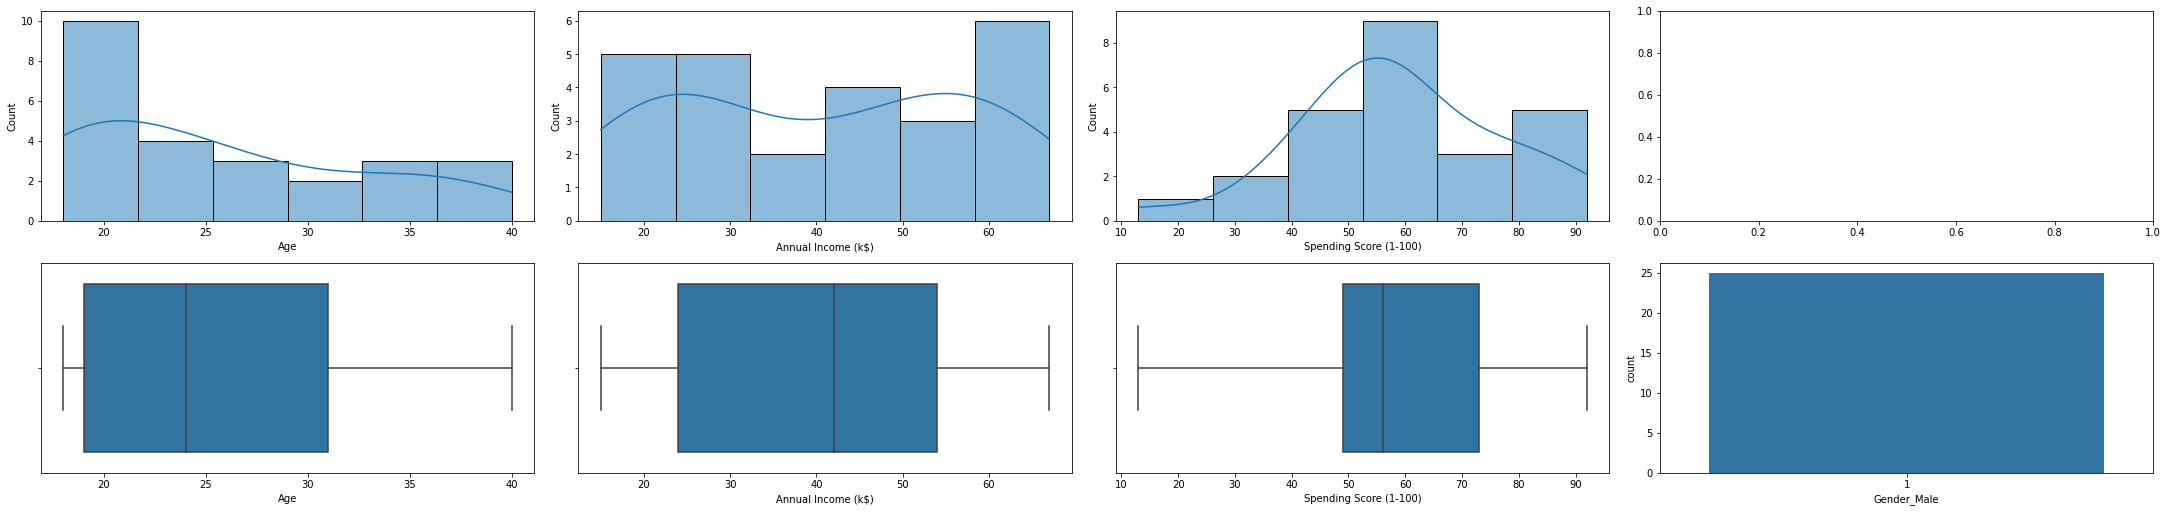

In [ ]:
# Menampilkan distribusi dari cluster 4
plot_cluster(cluster5)

Ciri - Ciri Cluster 5 :
- Semuanya laki-laki
- Rata-rata Pendapatannya $40.000/ tahun
- Umurnya kebanyakan di usia 19-31 dilihat dari q3 dan q1 (Usia remaja dan pemuda/pemudi)
- Spending Scorenya rata-rata 59 (konsumtif)

# **Kesimpulan**

1.  Model **Birch** memiliki performa yang lebih baik, bila dibandingkan dengan AlgomerativeClustering dan K-Means
2.  Berdasarkan *elbow-rule* 5 cluster merupakan jumlah cluster optimal

3. Tiap cluster memiliki deskripsi sebagai berikut : 


In [ ]:
# TODO : DESKRIPSI DARI TIAP CLUSTER
br.plot_3d(cols[0],cols[1],cols[2])